# Introduction

For this guided project, we'll be introducing the dataset *Productivity Prediction of Garment Employees*. The original dataset is in the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) Below is a description of the dataset, according to its official summary:

 > *The garment industry is one of the key examples of the industrial globalization of the modern era.*

  > *It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.*

  > *So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.*

  What's interesting about the dataset is that we can use it with both **regression and classification algorithms**, as is clearly stated in the final sentence of the official summary:

> This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes.


#Dataset dictionary

01	`date`			:	Date in MM-DD-YYYY

02	`day`			:	Day of the Week

03	`quarter`			:	A portion of the month. A month was divided into four quarters

04	`department`		:	Associated department with the instance

05	`team_no`			:	Associated team number with the instance

06	`no_of_workers`		:	Number of workers in each team

07	`no_of_style_change`	:	Number of changes in the style of a particular product

08	`targeted_productivity`	:	Targeted productivity set by the Authority for each team for each day.

09	`smv`			:	Standard Minute Value, it is the allocated time for a task

10	`wip`			:	Work in progress. Includes the number of unfinished items for products

11	`over_time`		:	Represents the amount of overtime by each team in minutes

12	`incentive`		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13	`idle_time`		:	The amount of time when the production was interrupted due to several reasons

14	`idle_men`		:	The number of workers who were idle due to production interruption

15	`actual_productivity`	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

#Objective

The primary objective of this project is to develop a predictive model that can accurately classify or predict the productivity performance of garment employees based on various features provided in the dataset.

#Import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#load Dataset


In [40]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


#Dataset Exploration

1. Get the shape of the dataset.

1. Inspect the dataset using the `info() `and `describe()` methods.

1. Explore the columns:

* What type of data does each column include?
* Are there any missing or incorrect values?
* What is the count of observations for each unique value within each column?

In [24]:
df.describe(include="all")

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


In [19]:
print(f"Dataset Shape {df.shape}\n")
print(f"Dataset info: {df.info()} \n")

Dataset Shape (1197, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 no

In [28]:
# we'll print out the value counts for the columns that have unique value less than 12
col = ['quarter', 'department', 'day', 'team', 'targeted_productivity',
       'idle_time', 'idle_men', 'no_of_style_change']

for i in col:
    print(f'Column "{i}":')
    print(df[i].value_counts())
    print('\n')

Column "quarter":
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


Column "department":
department
sweing       691
finishing    506
Name: count, dtype: int64


Column "day":
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


Column "team":
team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64


Column "targeted_productivity":
targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64


Column "idle_time":
idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64


Column "idle_men":
idle_men
0     1179
1

##Dataset Insights

From those statistics above we can see that the garments_workers_produtivity has some highlights

1. The dataset shape is 1197 rows for 15 columns
1. From those 15 column all of them do not have missing values, except by one `(WIP - Work in progress)`. Meaning that NaN values represent that at that observation did not have any unfinished products. Knowing that, we can convert NaN to **zero**. In order words: there is no unfinished product.
1. 10 columns are numerical ones, and 5 of columns are categorical. From 5 columns, there are some considerations
  
  * Date column is a timestamp column. It can be converted into three separated columns by day, month and year

1. `quarter` - there is a suspecious value `Quarter5`

In [22]:
# Compare relevant columns
relavant_columns = ['targeted_productivity', 'actual_productivity']
print('\nComparison of Relevant Columns: ')
print(df[relavant_columns].describe())


Comparison of Relevant Columns: 
       targeted_productivity  actual_productivity
count            1197.000000          1197.000000
mean                0.729632             0.735091
std                 0.097891             0.174488
min                 0.070000             0.233705
25%                 0.700000             0.650307
50%                 0.750000             0.773333
75%                 0.800000             0.850253
max                 0.800000             1.120437


**Observations:**
The mean of 'actual_productivity'(0.735) is slightly higher than the mean of 'targeted_productivity'(0.730).

#Data Cleaning


In [41]:
# Examine the value counts for the department column
department_count = df['department'].apply(lambda x: (x, len(x)))
print('Value Counts for Department Column:')
print(department_count.value_counts())

Value Counts for Department Column:
department
(sweing, 6)         691
(finishing , 10)    257
(finishing, 9)      249
Name: count, dtype: int64


**Observations:**
* The 'department' column contains variations in department names due to inconsistent spacing, particularly in the 'finishing' department.
*Some entries have a space after the department name, while ohters do not.

In [42]:
# Fix the observations by removing trailing whitespaces
df['department'] = df['department'].str.strip()

In [43]:
print(df['department'].value_counts())

department
sweing       691
finishing    506
Name: count, dtype: int64


There is **Quarter5** in the quarter column. Lets investigate its timestamp.

In [44]:
df.loc[df['quarter'] == 'Quarter5', 'date'].value_counts()

,count
date,
1/31/2015,24
1/29/2015,20


From the timestamp above , we can see that the dataset labels 31/01 and 29/01 as quarter 5 incorrectly.

**We will merge it in month quarter 4.**

In [45]:
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,292
Quarter3,210


##Target Variable (y)

As our topic stated "Productivity Prediction", so our target variable should be about the productivity. Althout we have the `actual_productivity` that we can use directly, but different task or item may required different score, as we can see from the `targeted_productivity`

Thus, we'll be creating one more column called productive, indicates whether the **productivity targets were achieved**, and this will be our target vaeiable y

In [46]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df["productive"].value_counts()

,count
productive,
True,875
False,322


#Modifying

It's unnecessary to keep the words **quarter** for every value, so we'll just remain the integers.

In [48]:
df['quarter'] = df['quarter'].astype(str).str[-1]
df["quarter"] = df["quarter"].astype("int")

df["quarter"].value_counts()

,count
quarter,
1,360
2,335
4,292
3,210


##Dummies Columns

Below variables are considered to convert into booleans:

* `department`: binary values, will set True for sweing and False for finishing
* `quarter`: values range from 1 to 4, but the order does not necessarily imply severity in a linear way, should convert to dummy
* `day & team:` similar to the above

In [49]:
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)

mod_df = pd.get_dummies(data=df, columns=['quarter', 'day', 'team'], drop_first=False)
mod_df.head()


<ipython-input-49-5a52bf6039bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)
<ipython-input-49-5a52bf6039bf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["department"].replace({"finishing": 0, "sweing": 1}, inplace = 

,date,department,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1/1/2015,1,0.80,26.16,1108.0,7080,98,0.0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,1/1/2015,0,0.75,3.94,NaN,960,0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1/1/2015,1,0.80,11.41,968.0,3660,50,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,1/1/2015,1,0.80,11.41,968.0,3660,50,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,1/1/2015,1,0.80,25.90,1170.0,1920,50,0.0,0,0,...,False,False,False,True,False,False,False,False,False,False


##Removing Unnecessary Columns

Moving on, we'll be considering the below columns to be removed:

`date`: it has only three month period, which exact date is meaningless for the performace, especially we have the quarter column which indicates the week of the month

`idle_time` & `idle_men`: there are only 18 observations with non-zero values which barely add any information

`wip`: there are too many empty observations, and we can't tell if an empty cell means no unfinished item or just missing information

`no_of_style_change`: there are only few non-zero values

`actual_productivity`: which we had converted to productive

We're not removing targeted_productivity because the score set in advance might be meaningful whether it's set too high or something else.

In [51]:
mod_df = mod_df.drop(["date", "idle_time", "idle_men", "wip", "no_of_style_change", "actual_productivity"], axis = 1)
mod_df.head()

,department,targeted_productivity,smv,over_time,incentive,no_of_workers,productive,quarter_1,quarter_2,quarter_3,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,59.0,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.75,3.94,960,0,8.0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.80,11.41,3660,50,30.5,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.80,11.41,3660,50,30.5,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,0.80,25.90,1920,50,56.0,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False


#Building the Tree - Classification Tree

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [53]:
X = mod_df.drop(["productive"], axis = 1)
y = mod_df["productive"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, shuffle = True, random_state = 369)

tree = DecisionTreeClassifier(max_depth=3, random_state=369)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=369)

#Visualizing the Tree


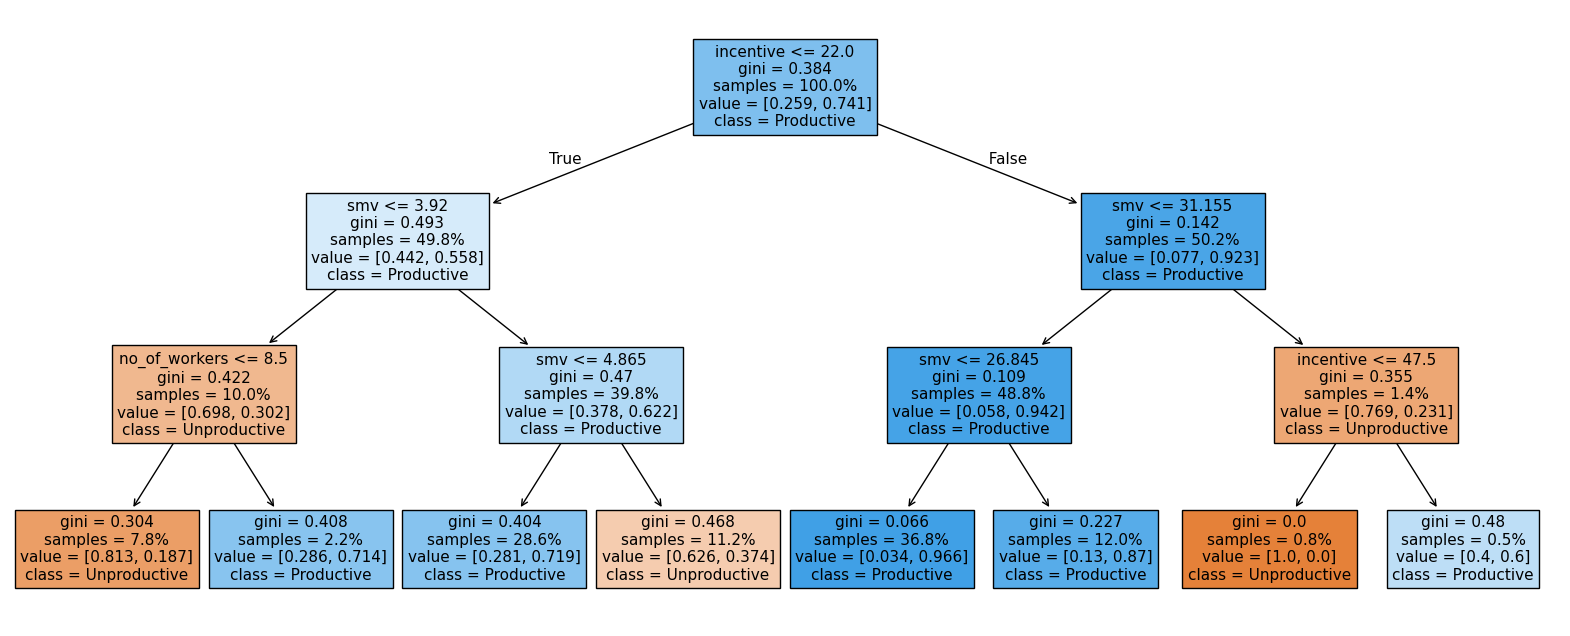

In [54]:
plt.figure(figsize = [20.0, 8.0])

_ = plot_tree(tree,
              feature_names = X.columns,
              class_names = ["Unproductive", "Productive"],
              filled = True,
              rounded = False,
              proportion = True,
              fontsize = 11)

From above we can see that `smv` is the most significant column with 4 split, following by 2 times `incentive` and one `no_of_workers`. This is restricted under the three levels of maximum depth to avoiding overfitting.

#Evaluating the tree


In [55]:
from sklearn.metrics import confusion_matrix
y_pred = tree.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy :", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall   :", round(recall_score(y_test, y_pred), 2))
print("F1 Score :", round(f1_score(y_test, y_pred), 2))

Confusion Matrix:
 [[ 39  35]
 [ 14 152]]

Accuracy : 0.8
Precision: 0.81
Recall   : 0.92
F1 Score : 0.86


All the metrics are more than 0.80, with the outstanding of Recall, scoring 0.92, which is nice!

#Executive Summary

We used **decision trees** to build the predictive model based on employee productivity data. They are supervised machine learning algorithms, meaning that there is data with target columns (labels) available for training the model. The ultimate goal of decision trees is to split our datasets into homogeneous groups of observations.

With our emloyee productivity dataset, we reduced the number of columns (features) to what we consider having most impact on the productivity levels.

Above you see a visualisation of the decision tree based on our dataset, with observations that belong to the same target column class, being either Productivity not met in orange or Productivity met in blue.

Decision trees work by recursively splitting our datasets based on binary conditions, called thresholds, for example "Number of workers <= 8.5", which is the first threshold at the top (root) node. The rest of the tree is traversed down by going either left (true) or right (false), to finally arrive at the target class in the terminal nodes (leaves)

How this works? Then we need to firstly look at the top of the box, it stated as "incentive <= 22". The number is a threshold which handle the split. Lets say we have a new observations with "incentive = 38", no matter what other values are, it's higher than 22 which mean a False for this box, and a False on a box means we need turn right, and we can see that there is another box at the below right side is waiting for us. Until now we have complated the first level, then we need to continue the same process on each box we reached until we dont see another 2 boxes is spliting our current box.


#Random Forest

Before we end the section, let's use the random forest algorithm to confirm whether the decision tree is already an optimal model, or we need to improve it's accuracy. This is also to avoid the overfitting the data with only a single tree

In [56]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(oob_score=True, random_state=24)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [57]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy :", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall   :", round(recall_score(y_test, y_pred), 2))
print("F1 Score :", round(f1_score(y_test, y_pred), 2))

Confusion Matrix:
 [[ 39  35]
 [ 16 150]]

Accuracy : 0.79
Precision: 0.81
Recall   : 0.9
F1 Score : 0.85


Lets check also the Out of Bag Score, which directly estimate the model's performance, compared to the accuracy we calculated above.

In [58]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83


Upon all the metrics above, we have a good result which is also similar to the decision tree we had make earlier, so **it's not necessary to improve our decision tree.**